<a href="https://colab.research.google.com/github/Abdulwaliy/MathforNeuroscience/blob/main/Linear_Algebra_I%2C_Vectors_Week1Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1

**Linear Algebra I, Vectors**

**[insert your name]**

**Important reminders**: Before starting, click "File -> Save a copy in Drive". Produce a pdf for submission by "File -> Print" and then choose "Save to PDF".

To complete this tutorial, you should have watched Video 1.1: Vectors and Video 1.2: Vector operations.

**Learning objectives**
* Review and use vector properties and operations such as vector length, scalar multiplication, and vector addition
* Gain a better understanding of the dot product
* Think about optimal stimuli in the context of linear algebra
* Gain more intuition about correlation coefficients


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets

# Plotting parameters
matplotlib.rcParams.update({'font.size': 22})

In [16]:
# @title Hidden functions

def generate_unit_vec(dim=4):
  """Generate random unit vector with only positive values. Please note that this
  is not at all a principled correct way of doing this (not truly random)

  Args:
    dim (scalar): dimension of the unit vector

  """
  vec = -1* np.ones(dim,)
  while np.any(vec<0):
    vec = np.random.randn(4,)
  unit_vec = vec/np.linalg.norm(vec)
  return unit_vec

def plot_responses_vs_angles(responses, angles):
  """ Plot neural responses as a function of the angle between the pixel vector
  and weight vector.

  Args:
    responses (ndarray): the responses of the neuron to each image (n_images x 1)
    angles (ndarray): the corresponding angle of each image to the weight vector (n_images x 1)

  """

  fig, ax = plt.subplots(1, 1, figsize=(10,10))
  ax.plot(angles, responses, 'o', color = '#0DD3C4')
  ax.set(xlabel='Angle (degrees)', ylabel='Neural response')

# Coding tips

We will mostly use numpy in this course, especially for the linear algebra section. We can use 1D numpy arrays for vectors: for example we could write $\bar{x}$ = [4, 5] as `x = np.array([4, 5])`.



In [2]:
# Defining vectors
x = np.array([4, 5])
y = np.array([1, 2])

# Length of a vector
length_of_x = np.linalg.norm(x)

# Scalar multiplication
scalar_multiplied_x = 5*x

# Vector addition
summed_vectors = x + y

# Dot product
dot_prod = np.dot(x, y)

# Exercise 1: Vector addition & scalar multiplication

In the following demo, we will demonstrate a **linear combination** of two vectors, $\mathbf{x}$ and $\mathbf{y}$ (where we multiply each vector by a scalar value and multiply):

$$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$$

where $\mathbf{x}$ and $\mathbf{y}$ are vectors, while $a$ and $b$ are scalars. Specifically, $\mathbf{x} = \begin{bmatrix}3 \\ 1 \\\end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}-1 \\ 2 \\\end{bmatrix}$.


You will play with the scalar multiples $a$ and $b$ to visualize both scalar multiplication and vector addition. Think and talk through the following questions:


1.   How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is negative?
2.   How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is a fraction?
3.  Can you get $\mathbf{z}$ to point to anywhere in the 2D space with combinations of $a$ and $b$?
4.  Would this be the case no matter what $\mathbf{x}$ and $\mathbf{y}$ are, as long as they are both 2D vectors?

*YOUR ANSWERS HERE*

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

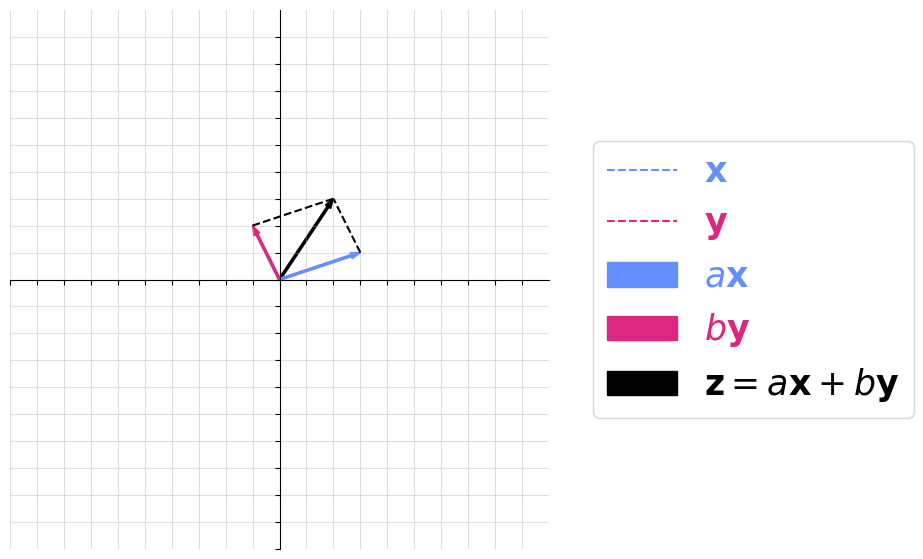

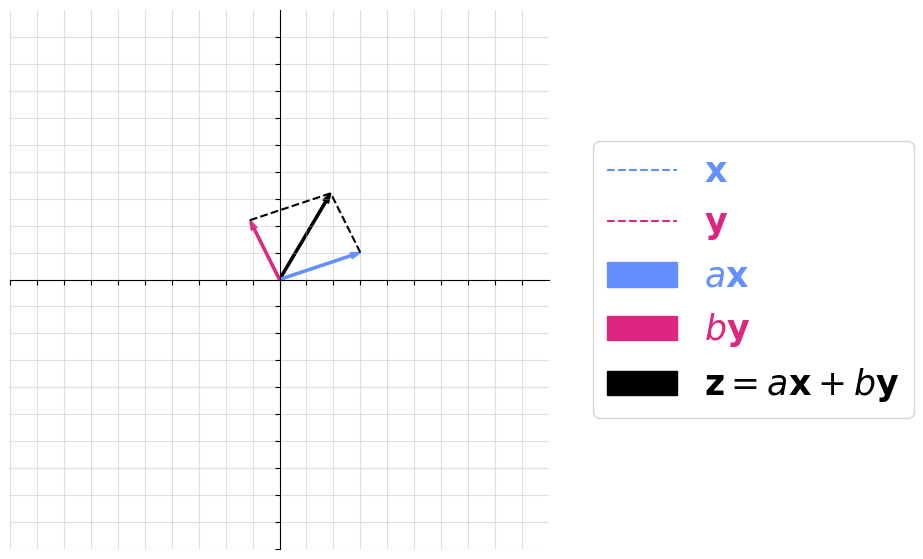

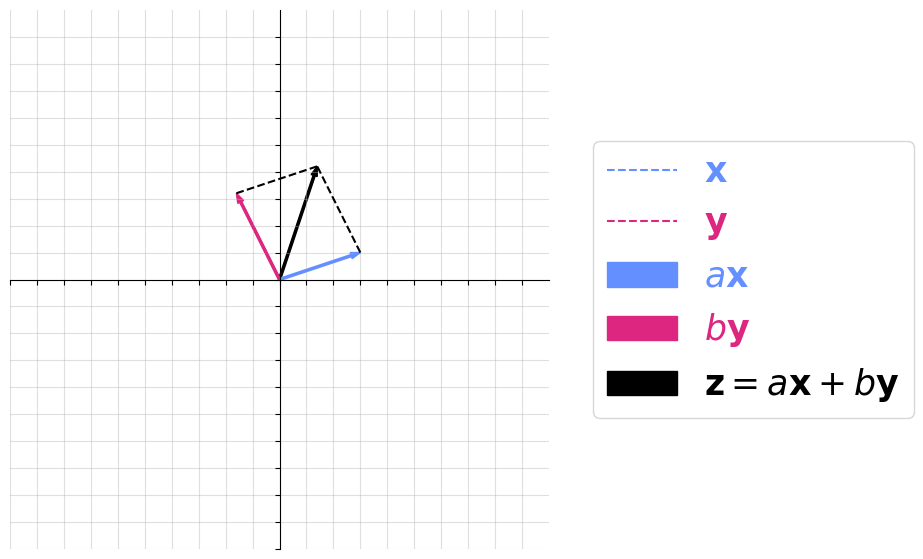

In [3]:
#@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)

# Exercise 2: Dot product geometrical properties

In this exercise, we will explore and prove the relationship between the dot product of two vectors and the angle between them.



### A) Interactive demo

First, use the following interactive demo to change the dot product of two vectors and see what happens to them (under the constraint that each vector stays the same length).


interactive(children=(FloatSlider(value=1.0, description='dot_prod', max=12.3, min=-12.3), Output()), _dom_cla…

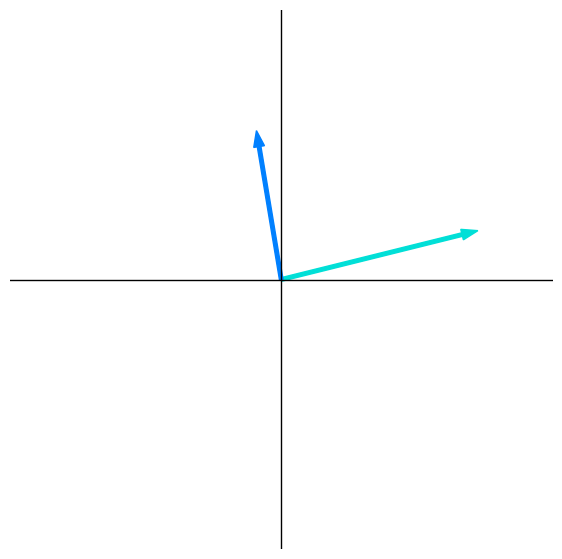

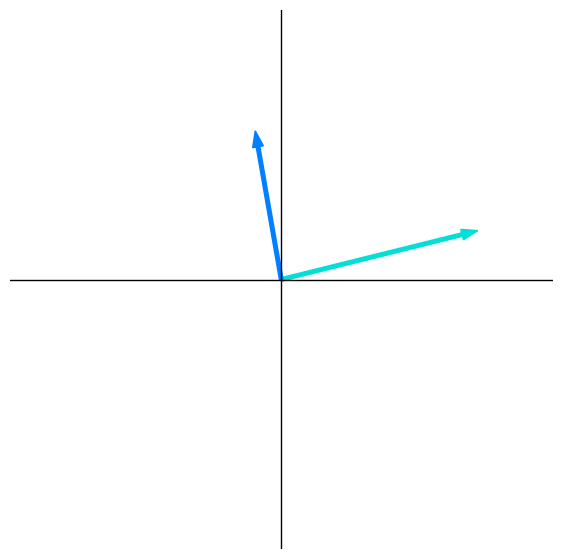

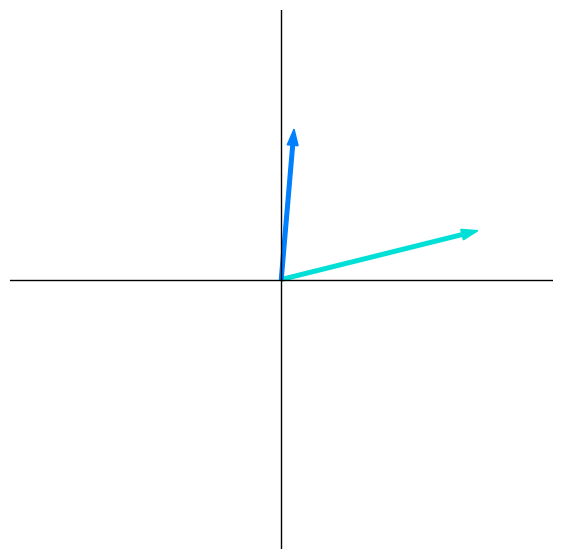

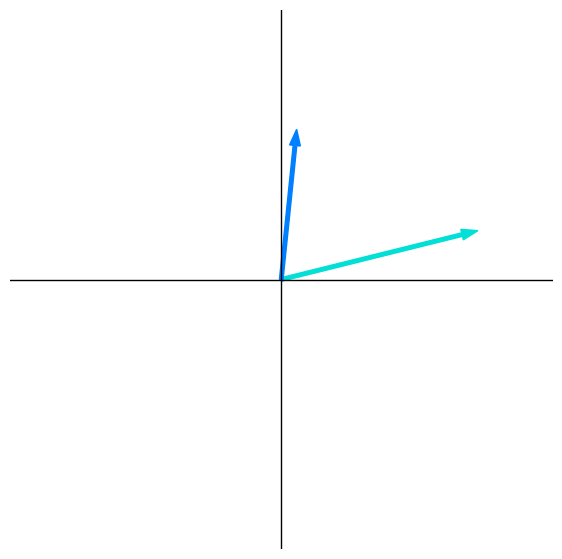

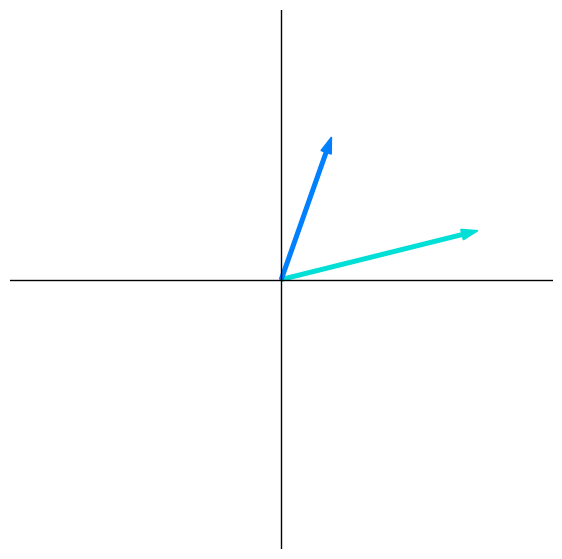

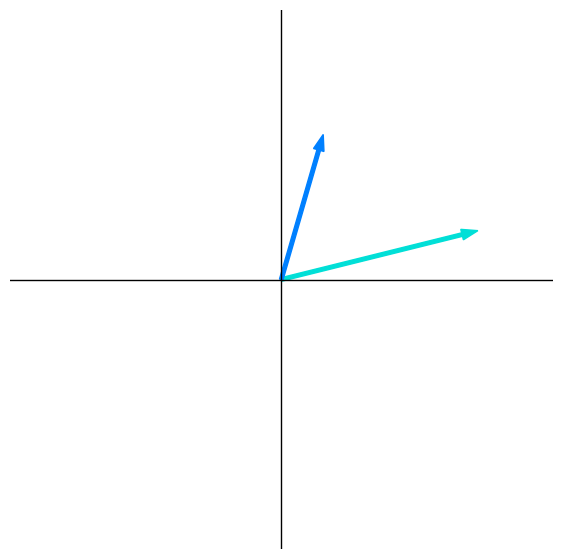

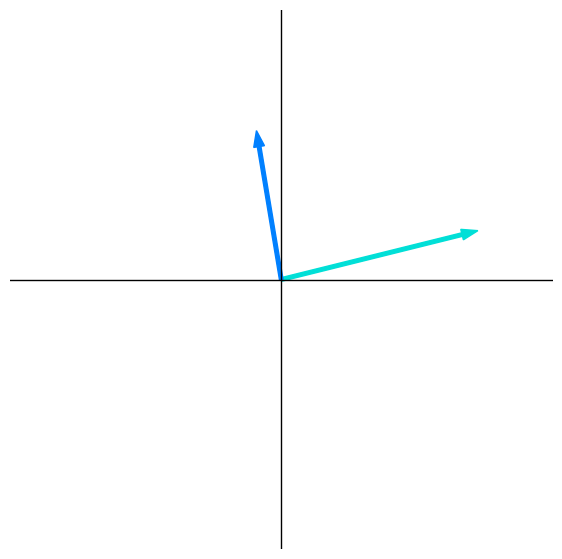

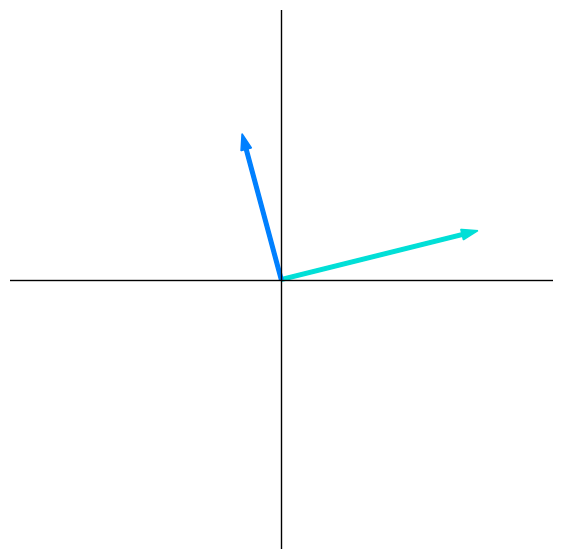

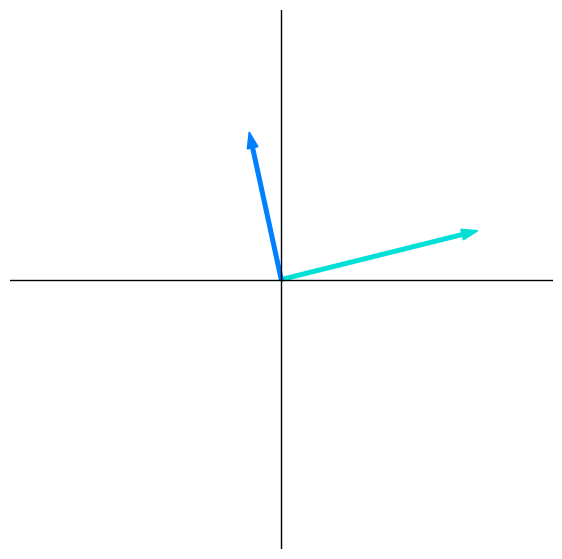

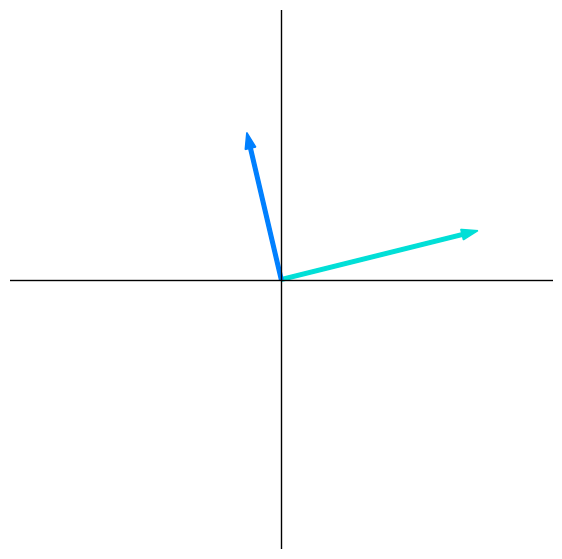

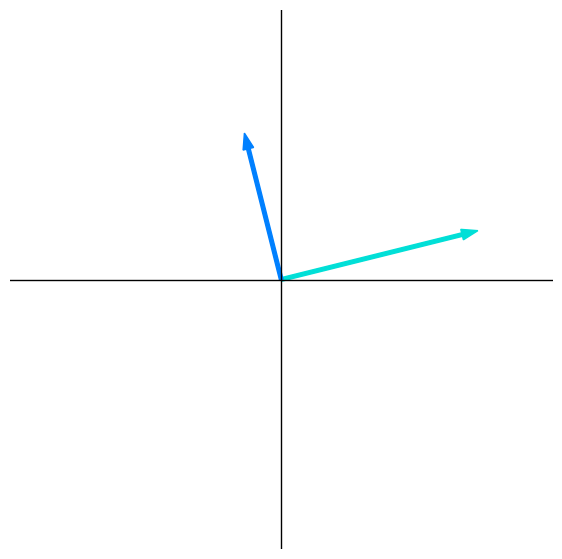

In [5]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

def solve_equations(dot_prod, x = [4, 1], norm_x = np.sqrt(17), norm_y = 3):
  i = 0 if dot_prod < 0 else 1
  y1 = np.roots([17, -8*dot_prod, dot_prod**2-9])[i]
  y2 = dot_prod - 4*y1
  y = [y1, y2]
  return y

def plot_arrows(x, y):
  fig, ax = plt.subplots(figsize=(7, 7))

  ax.axhline(linewidth=1, color='k') #adds thick red line @ y=0
  ax.axvline(linewidth=1, color='k')
  #ax.grid()
  ax.set_xlim([-6, 6])
  ax.set_ylim([-6, 6])
  ax.axis('Off')


  ax.arrow(0, 0, x[0], x[1], width=.08, color='#01DFD7');
  ax.arrow(0, 0, y[0], y[1], width=.08, color='#0080FF');


@widgets.interact(dot_prod=widgets.FloatSlider(value=1.0, min=-12.3, max=12.3, step=0.1))
def plot_data_estimate(dot_prod):
  y = solve_equations(dot_prod)
  plot_arrows([4, 1], y)


i) Does the angle between vectors increase or decrease as the dot product increases?

ii) Does it seem like anything is special about a dot product of 0?


*YOUR ANSWERS HERE*

It turns out that there is a direct relationship between the dot product of two vecors and the angle between them. **The dot product is equal to the length of vector 1 multiplied by the length of vector 2 multiplied by the cosine of the angle**:

$$ \bar{x} \cdot \bar{y} =  ||\bar{x}|| ||\bar{y}|| cos(\theta) $$


### B) (Optional) Proof of relationship

We can work through a guided proof of this relationship - our first proof! Note that this is optional: move on and return to this if you have the time.

![picture](https://drive.google.com/uc?export=view&id=1Lxj0dY_8CpgMhR_SSeRuQdO6-AYpwgj6)


i) Start by using the law of cosines to write out a formula for $||\bar{a}||^2$

ii) Next, figure out what $||\bar{a}||$ equals in terms of $\bar{x}$ and $\bar{y}$ (hint: think about vector operations/stacking vectors)

iii) Write $||\bar{a}||^2$ in terms of a dot product. Substitute in the definition of $||\bar{a}||$ from ii and expand.

iv) Equate the formulas for $||\bar{a}||^2$ from i and iii and rearrange to solve for the dot product of $\bar{x}$ and $\bar{y}$. You should get the equation above!


## C) Resulting properties of the dot product

There are some key properties of the dot product that are easier to see now that we have the definition in terms of the angle between vectors:

$$ \bar{x} \cdot \bar{y} =  ||\bar{x}|| ||\bar{y}|| cos(\theta) $$


i) What does a dot product of zero tell us about the angle between two vectors? (Optional: Can you think of a term that describes two vectors with this angle between them?)

ii) If you are taking the dot product of two unit vectors, what is the maximum dot product and what is the minimum?

iii) What is the maximum dot product if you can change the length of the two vectors and angle between them?

*YOUR ANSWERS HERE*

# Exercise 3: Optimal stimuli for a neuron

Let's say that we are modeling the response of a retinal ganglion cell with a receptive field equal to 4 pixels. We are using a simple model in which the response of the neuron corresponds to the weighted sum of the pixel intensities of those 4 pixels. Specifically, the weight from pixel 1 is 2, the weight from pixel 2 is 4, the weight from pixel 3 is 1, and the weight from pixel 4 is 5.

## A) Coding the neuron

Complete the function below to compute the response of the model neuron described above given pixel intensities $P_1$ through $P_4$. Use the dot product function `np.dot`. Fill in all `...`


In [11]:
def compute_response(weights, pixels):

  r = np.dot(weights, pixels) # compute the response

  return r

# Example pixel values
p1 = 3
p2 = 2
p3 = 1
p4 = 3

pixels = np.array([ 3, 2, 1, 3])
weights = np.array([2, 4, 1, 5]) # set the weights of the neuron
response = compute_response(weights, pixels)

# Uncomment below when done
print(response)

30


You should get a response of 30.

## B) Experimentation

Let's say that we're recording the responses of the neuron while presenting various "images" (various pixel combinations that we represent with a vector). We are choosing these images so that our pixel vector is always a unit vector. For each random image, compute the response and the angle of that pixel vector with the vector of weights (hint: use `np.arccos`). We will then plot the neural response as a function of the angle (using a hidden function `plot_responses_vs_angles`).

Note that the concept of an angle is hard to visualize here when we're working in 4D space! It can be helpful to visualize as if in 2D

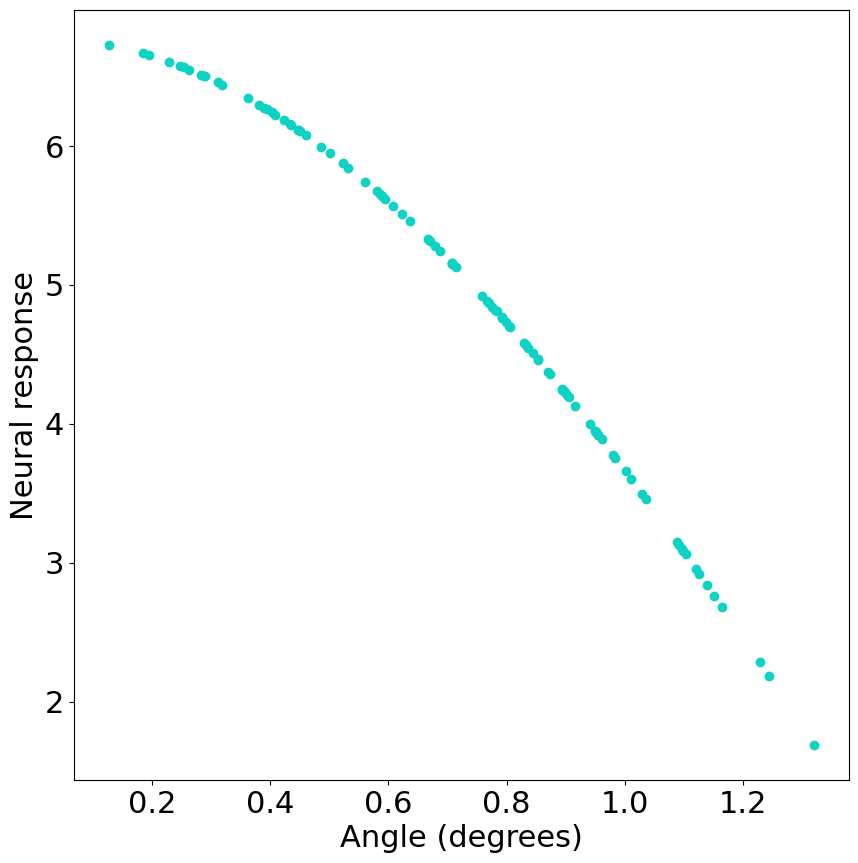

In [28]:
#def generate_unit_vec(vector):
 # unit_vector = vector / np.linalg.norm(vector)
  #return unit_vector



n_images = 100 # how many images we present

# Set up arrays for storing responses/angles
responses = np.zeros((n_images,))
angles = np.zeros((n_images))
responses[:] = np.nan
angles[:] = np.nan

# Loop through images
for i_image in range(n_images):

  pixel_vector = generate_unit_vec()

  ## Fill out below and uncomment

  # Compute the response of the neuron (hint: use part A)
  responses[i_image] = compute_response(weights, pixel_vector)

  # Compute the angle between pixel vector and the weight vector (hint: use dot product def again and np.arccos)
  angles[i_image] = np.arccos(compute_response(weights, pixel_vector)/((np.linalg.norm(weights)*np.linalg.norm(pixel_vector))))
  #print(responses[i_image])
  #print(angles[i_image])
plot_responses_vs_angles(responses, angles)

From the resulting plot, what can you tell about how the image similarity to the weights (in terms of angle between weight and pixel vector) affects neural response?

**Optional advanced**: Why do the angles only go between 0 and ~80 degrees? (as opposed to 0 and 180 degrees). Why am I specifying that the image should be a unit vector?

*YOUR ANSWERS HERE*

## C) Computing optimal stimuli

How could we compute the optimal stimulus for this neuron (i.e. the image that results in the largest neural response) given the constraint that it must be a unit vector?

i) Write out a formula for the optimal stimulus


ii) Compute the optimal stimulus below. Make sure the response to it is larger than any in the plot above

*i) YOUR ANSWERS HERE*

In [ ]:
optimal_stimulus = ...

# Uncomment below once you have computed the optimal stimulus
#max_response = compute_response(weights, optimal_stimulus)
#print(max_response)

# Exercise 4: Correlation coefficient

Suppose we record from a population of 10,000 neurons and extract each neuron's mean firing rate in condition A and condition B. To quantify population firing similarity between the two conditions, we might calculate the **Pearson correlation coefficient** of the firing rates in the two conditions.

Let $\{a_i\}_{i=1}^{10000}$ be the firing rates in condition A and $\{b_i\}_{i=1}^{10000}$ be the firing rates in condition B. Then the Pearson correlation coefficient $\rho$ between the firing rates in the two conditions is calculated as:

$$ \rho = \frac{\sum_{i=1}^{10000}(a_i - \mu_a)(b_i - \mu_b)}{\sqrt{\sum_{i=1}^{10000}(a_i - \mu_a)^2}\sqrt{\sum_{i=1}^{10000}(b_i - \mu_b)^2}}$$

where $\mu_a$ and $\mu_b$ are the mean firing rates of the population in the two conditions.

For simplicity, let's say $\{x_i\}_{i=1}^{10000}$ are the firing rates in condition A with $\mu_a$ already subtracted ($x_i = a_i-\mu_a$) and $\{y_i\}_{i=1}^{10000}$ be the same for condition B ($y_i = b_i - \mu_b$).




## A) Derivation

Show how $\rho$ relates to the angle $\theta$ between the two mean zero population firing vectors, $\bar{x}$ and $\bar{y}$. You should end with an equation for $\rho$ in terms of $\theta$. Hint: how can you transform the equation above to vectors and dot products?

*YOUR ANSWER HERE*

## B) Verification with code

We will now compute the correlation coefficient of two firing rate vectors two ways: 1) using numpy's built in `np.corrcoef` function (provided) and 2) using your formula from part A.  Make sure the computed correlation coefficients from the two methods match!

In [29]:
## Method 1 (provided)

np.random.seed(123)

# Generate firing rate vectors (in Hz)
a = np.random.randint(0, 100, size=(10000,))
b = a+50*np.random.randn(10000,)

# Compute Pearsons correlation coefficient
p = np.corrcoef(a, b)[0, 1]
print('Pearson correlation coefficient = '+str(p))

Pearson correlation coefficient = 0.49406770864742755


In [ ]:
## Method 2 (your turn)

# Use your formula from Part A to compute the correlation coefficient
# Hint: you'll need to compute the angle between vectors

your_p = ...
print('Pearson correlation coefficient = '+str(your_p))
